In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("/content/laptop.csv")

In [55]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [56]:
df.shape

(1303, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [58]:
df.duplicated().sum() # check duplicates

0

In [59]:
df.isnull().sum() #check null values

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [60]:
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']  # List of column names to drop
# Drop the specified columns
df=df.drop(columns=columns_to_drop)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [61]:
df=df.dropna()

In [62]:
df['Ram'] = df['Ram'].str.replace('GB','') # repalce "GB" from each item, leaving only the number behind.
df['Weight'] = df['Weight'].str.replace('kg','') # repalce "kg" from each item, leaving only the number behind.


<ipython-input-62-d8db47ac0c55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].str.replace('GB','') # repalce "GB" from each item, leaving only the number behind.
<ipython-input-62-d8db47ac0c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].str.replace('kg','') # repalce "kg" from each item, leaving only the number behind.


In [63]:
# Replace '?' with NaN (missing values)
df['Weight'] = df['Weight'].replace('?', np.nan)## repalce "?" from each item with null.
df['Inches'] = df['Inches'].replace('?', np.nan)## repalce "?" from each item with null

<ipython-input-63-b794f42b7b0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].replace('?', np.nan)## repalce "?" from each item with null.
<ipython-input-63-b794f42b7b0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inches'] = df['Inches'].replace('?', np.nan)## repalce "?" from each item with null


In [64]:
df.isnull().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [65]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

<ipython-input-65-6e632f1a519d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].astype('int32')
<ipython-input-65-6e632f1a519d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].astype('float32')


In [66]:
df=df.dropna()

In [67]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [68]:
# Calculate the mean of the 'Weight' column
mean_weight = df['Weight'].mean()

# Fill the null value with the mean
df['Weight'].fillna(mean_weight, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1271 non-null   object 
 1   TypeName          1271 non-null   object 
 2   Inches            1271 non-null   object 
 3   ScreenResolution  1271 non-null   object 
 4   Cpu               1271 non-null   object 
 5   Ram               1271 non-null   int32  
 6   Memory            1271 non-null   object 
 7   Gpu               1271 non-null   object 
 8   OpSys             1271 non-null   object 
 9   Weight            1271 non-null   float32
 10  Price             1271 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 109.2+ KB


In [70]:
df1=df.copy()
df1

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


# **Feature Engineering**

For feature engineering on the **ScreenResolution** column, you can extract meaningful features that capture different aspects of the screen resolution, such as the resolution TouchScreen, IPS Panel etc

In [71]:
#Using lambda function to check Touchscreen laptop
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [72]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)# spliting data and storing in tempory data

df['X_res'] = new[0]
df['Y_res'] = new[1]

In [73]:
#removes any commas from the values, extracts the numerical parts using regular expressions, and keeps only the first numerical value for each entry.
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [74]:
#'X_res' and 'Y_res' columns from float to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [75]:
df1=df.copy()

In [76]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
992,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,128GB SSD,Intel HD Graphics 500,No OS,1.90,14418.6336,0,0,1366,768
1071,HP,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,63882.7200,0,0,1366,768
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.1200,1,1,1920,1080
94,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,55890.7200,0,0,1920,1080
518,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,47365.9200,0,0,1920,1080


In [77]:
df.corr()['Price'] # correlation w.r.t Price

<ipython-input-77-c4e42312c9cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'] # correlation w.r.t Price


Ram            0.686766
Weight         0.176701
Price          1.000000
Touchscreen    0.190030
Ips            0.256421
X_res          0.558247
Y_res          0.554789
Name: Price, dtype: float64

Ram,Screenresolution(X_res,Y_res) has strong correlation

In [78]:
# new column to calculates the pixel density of a screen, known as pixels per inch (PPI)
#convert the 'Inches' column to numerical values and  errors='coerce' parameter will handle any non-numeric values by converting them to NaN (missing values)
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [79]:
df.corr()['Price']

<ipython-input-79-3647a5458436>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.045042
Ram            0.686766
Weight         0.176701
Price          1.000000
Touchscreen    0.190030
Ips            0.256421
X_res          0.558247
Y_res          0.554789
ppi            0.469329
Name: Price, dtype: float64

Now, you can use the 'ppi' column instead of 'ScreenResolution' for further operations


In [80]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [81]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


Feature Engineering on **CPU**





In [30]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: Cpu, Length: 118, dtype: int64

In [82]:

df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [83]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: >

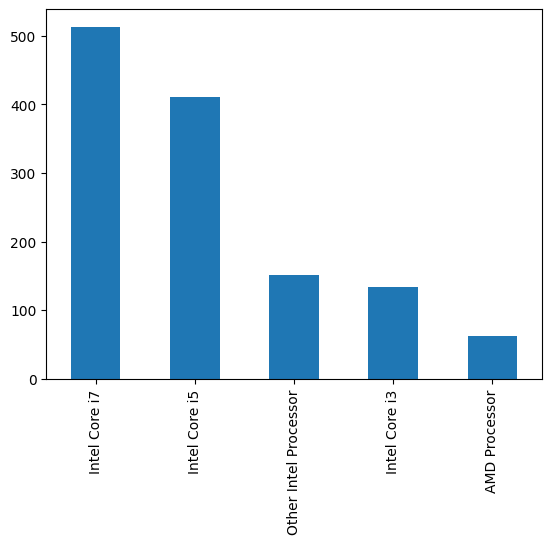

In [84]:
df['Cpu brand'].value_counts().plot(kind='bar')

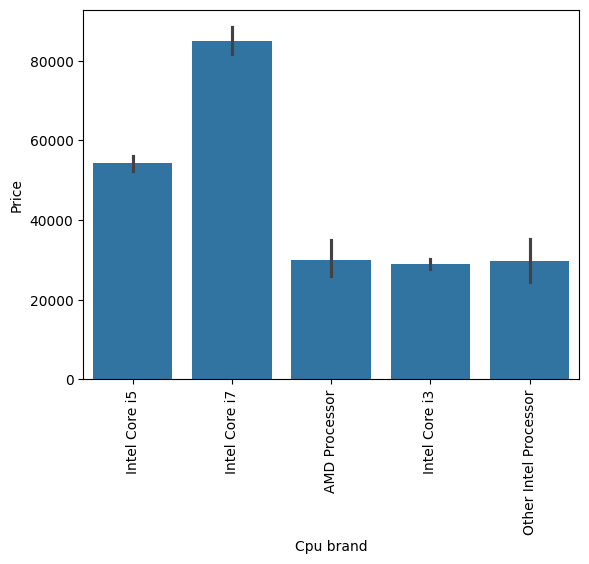

In [85]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation:**

The graph illustrates that laptops with Intel Core i7 CPUs have the highest prices, followed by those with Intel Core i5 CPUs, while other CPU brands have lower prices

In [86]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)


In [87]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Feature Engineering on **RAM**

<Axes: >

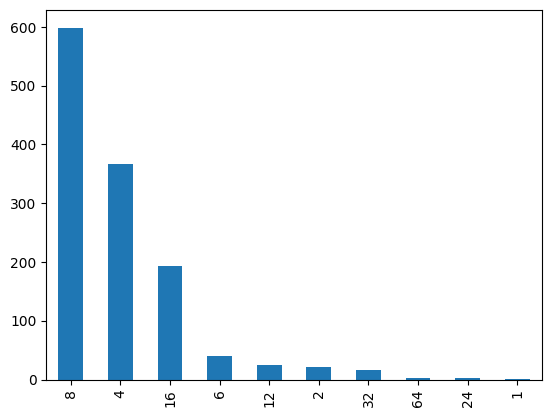

In [88]:
df['Ram'].value_counts().plot(kind='bar')

Observation:
Maximum laptops are 8 Gb Ram

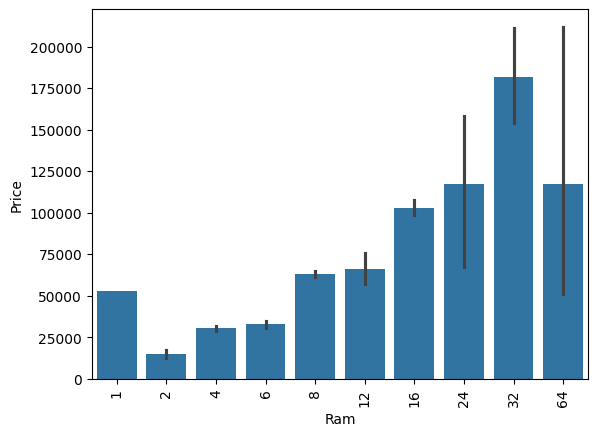

In [89]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Observation:

 In the dataset, laptops with 32GB RAM have the highest prices, followed by laptops with 24GB, 64GB, and 16GB RAM. However, laptops with RAM sizes ranging from 4GB to 12GB have prices below 75000.

**Feature Engineering for Memory**

In [90]:
df['Memory'].value_counts()

256GB SSD                        399
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [92]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')
# Fill empty strings with 0 in the 'first' and 'second' columns
df['first'].replace('', '0', inplace=True)
df['second'].replace('', '0', inplace=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-92-59e0c1d03667>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-92-59e0c1d03667>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [93]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
695,Acer,Netbook,4,32 Flash Storage,Intel HD Graphics,Windows 10,1.40,14332.3200,0,0,135.094211,Other Intel Processor,0,0,0,32
541,Dell,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,1.60,39207.1536,0,0,157.350512,Intel Core i3,0,128,0,0
449,Microsoft,Ultrabook,16,512 SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.9200,1,0,200.842560,Intel Core i7,0,512,0,0
75,Asus,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,50562.7200,0,0,141.211998,Intel Core i7,1000,0,0,0
993,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,2.30,71874.7200,0,0,141.211998,Intel Core i5,0,256,0,0


In [94]:
df.drop(columns=['Memory'],inplace=True)

In [95]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [96]:
df.corr()['Price']


<ipython-input-96-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.686766
Weight           0.176701
Price            1.000000
Touchscreen      0.190030
Ips              0.256421
ppi              0.469329
HDD             -0.094124
SSD              0.668731
Hybrid           0.008028
Flash_Storage   -0.038115
Name: Price, dtype: float64

In [97]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [98]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


**Feature Engineering on GPU**

In [99]:
df['Gpu'].value_counts()

Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [100]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [101]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [102]:
df['Gpu brand'].value_counts()

Intel     702
Nvidia    392
AMD       176
ARM         1
Name: Gpu brand, dtype: int64

In [208]:
df = df[df['Gpu brand'] != 'ARM']

In [103]:
df['Gpu brand'].value_counts()

Intel     702
Nvidia    392
AMD       176
ARM         1
Name: Gpu brand, dtype: int64

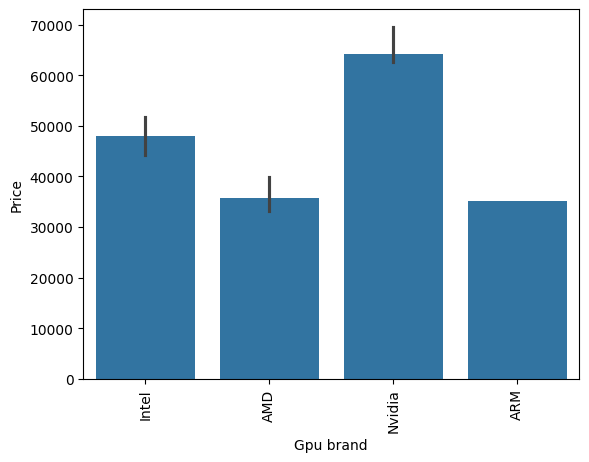

In [104]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [105]:
df.drop(columns=['Gpu'],inplace=True)

In [106]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


**Feature Engineering on OpSys**

In [107]:
df['OpSys'].value_counts()

Windows 10      1045
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

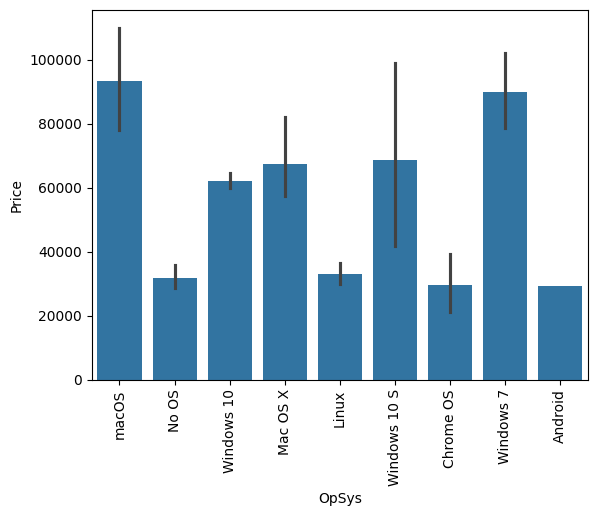

In [108]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [109]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [110]:
df['os'] = df['OpSys'].apply(cat_os)

In [111]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [112]:
df.drop(columns=['OpSys'],inplace=True)

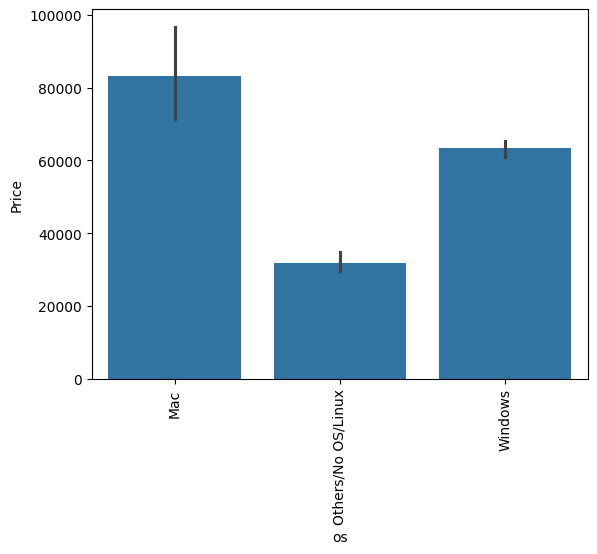

In [113]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-119-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

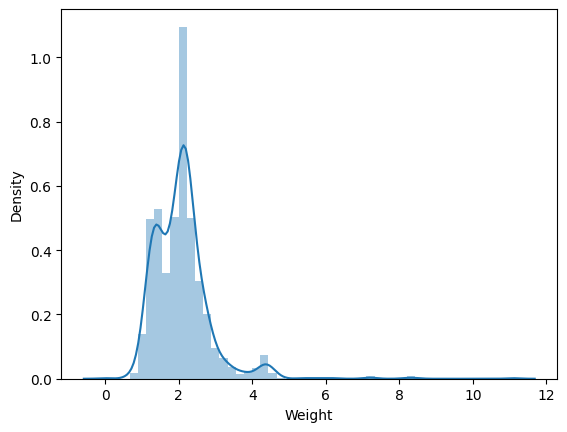

In [119]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

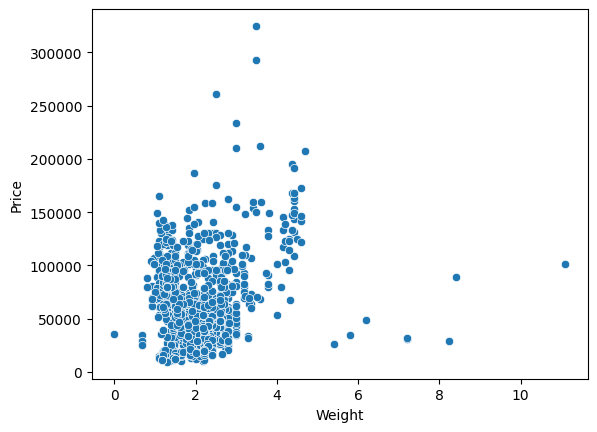

In [120]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [121]:
df.corr()['Price']

<ipython-input-121-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.686766
Weight         0.176701
Price          1.000000
Touchscreen    0.190030
Ips            0.256421
ppi            0.469329
HDD           -0.094124
SSD            0.668731
Name: Price, dtype: float64

<ipython-input-122-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

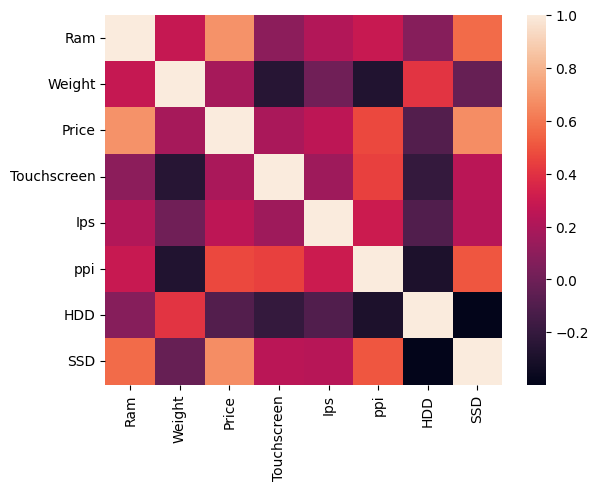

In [122]:
sns.heatmap(df.corr())

<ipython-input-123-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

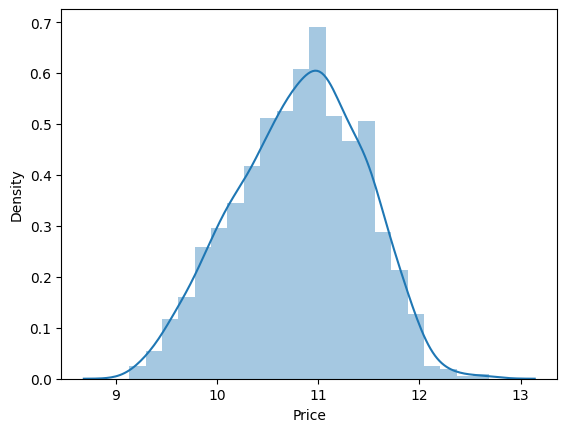

In [123]:
sns.distplot(np.log(df['Price']))

In [124]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [125]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [126]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1271, dtype: float64

# **Data visualization**
**Univariate analysis**

Here the aim is to check the distribution of the data. If it is normally distributed or skewed for numerical value. If it is a categorical value then we have to check if categories are balanced on unblanced.

<ipython-input-114-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

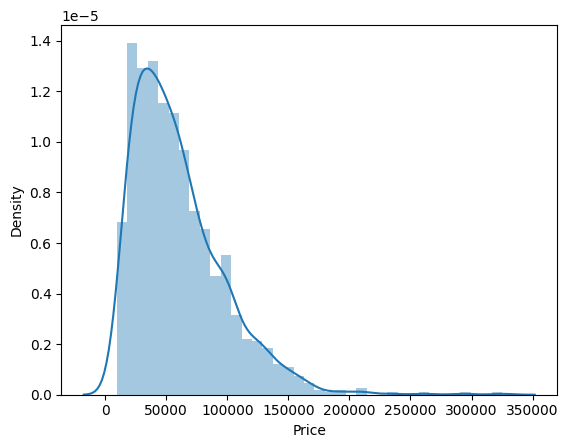

In [114]:
sns.distplot(df['Price'])

**Observation:**

From the distplot it looks likePrice of Laptop follows a right skewed graph.So, we have to focus on skewed data

<Axes: >

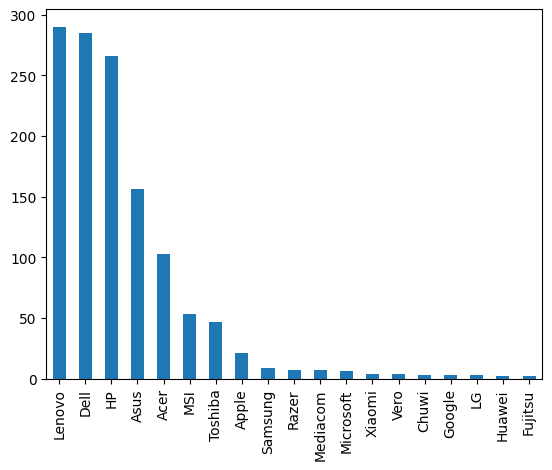

In [115]:
df['Company'].value_counts().plot(kind='bar')#counts the occurrences of each unique value in the 'Company' column

**Observation:**

Bar plot showing the distribution of laptops among different companies, where Lenovo, Dell, and HP have the highest numbers of laptops.

<Axes: >

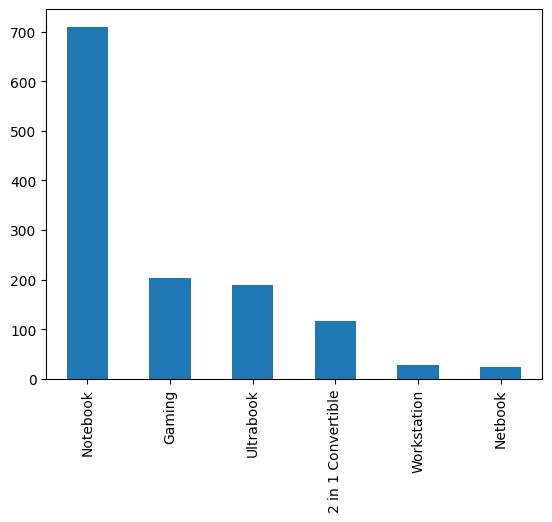

In [116]:
df['TypeName'].value_counts().plot(kind='bar')

**Observation:**

 Bar plot illustrating the distribution of laptop types, with 'Notebook' being the most common type followed by 'Gaming' and 'Ultrabook'.

<ipython-input-117-44d3d83e2db8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

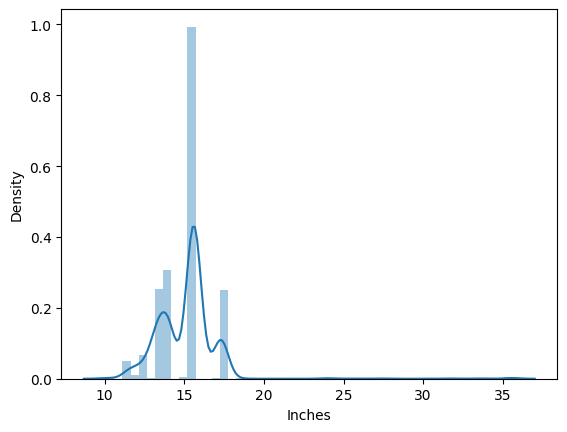

In [117]:
sns.distplot(df1['Inches'])

**Bivaritae Analysis**

Now lets find average price value with respect to each brand

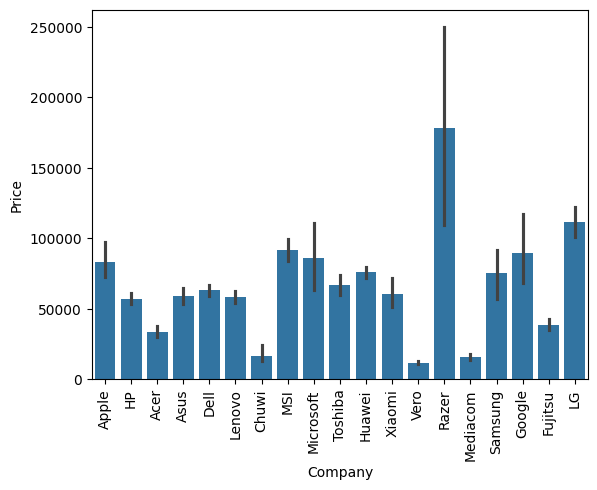

In [123]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation:**

This bar plot demonstrates that laptop prices vary among different companies. Companies like Razer, LG, MSI, Microsoft, and Apple tend to have higher prices, while Acer, HP, Lenovo, etc., are positioned in the medium price range.

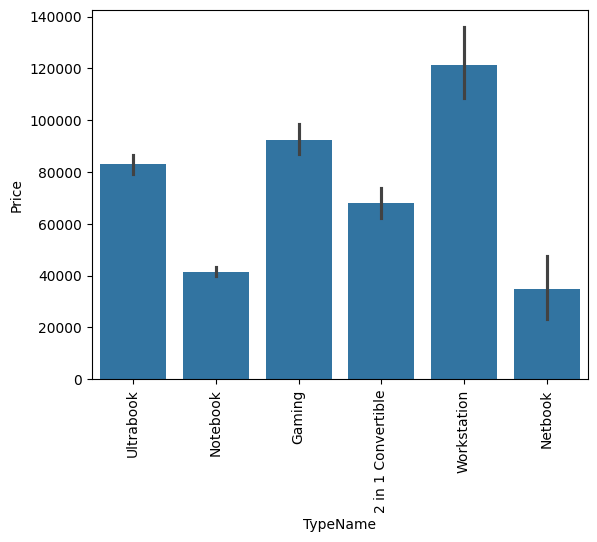

In [143]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation:**

The bar plot illustrates that Workstation laptops have the highest prices, followed by gaming laptops, and then ultrabooks.

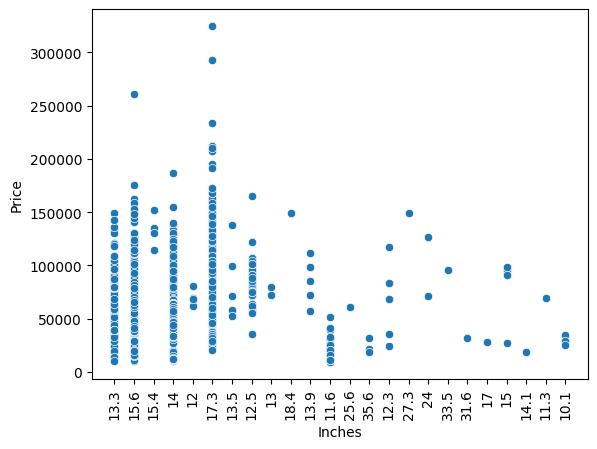

In [125]:
sns.scatterplot(x=df1['Inches'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Observation:**


There appears to be a mild correlation between the size of laptops and their prices, indicating that as the size increases, the price tends to vary, although not very strongly.

In [126]:
df1['ScreenResolution'].value_counts()

Full HD 1920x1080                                493
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

<Axes: >

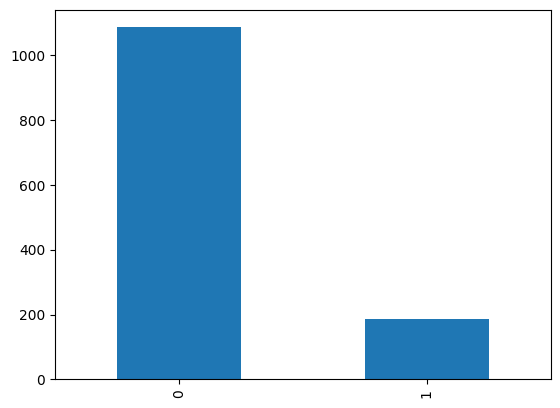

In [127]:
df1['Touchscreen'].value_counts().plot(kind='bar')

## **Observation:**

Bar plot illustrating the count of touchscreen laptops, with the majority falling below 200, indicating that most laptops in the dataset do not have touchscreen functionalit

<Axes: xlabel='Touchscreen', ylabel='Price'>

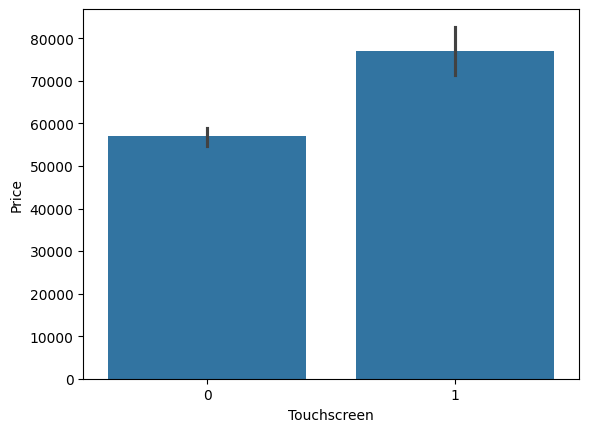

In [135]:
sns.barplot(x=df1['Touchscreen'],y=df['Price'])

**Observation:**

touchscreen laptops tend to have higher prices compared to non-touchscreen laptops.

<Axes: >

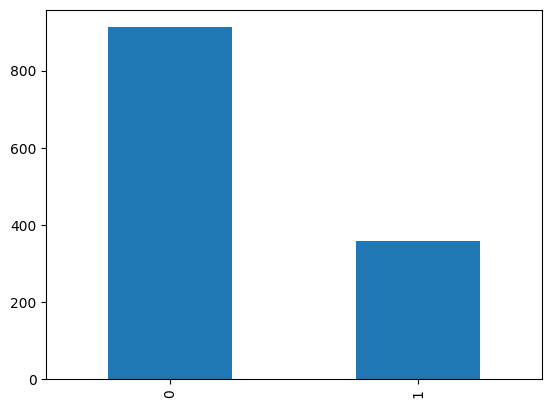

In [134]:
df1['Ips'].value_counts().plot(kind='bar')

**Observation:**

Bar plot illustrating the count of IPS Panel laptops, with the majority falling between 300-400, indicating that most laptops in the dataset do not have IPS functionality

<Axes: xlabel='Ips', ylabel='Price'>

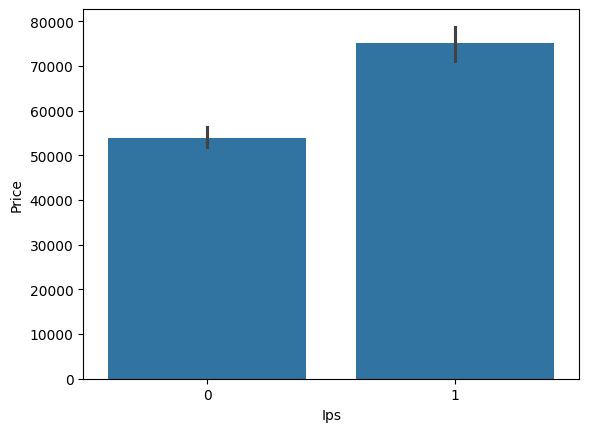

In [132]:
sns.barplot(x=df1['Ips'],y=df['Price'])

**Observation:**

IPS Panel laptops tend to have higher prices compared to other laptops.

**Observation:**

The graph illustrates that laptops with Intel Core i7 CPUs have the highest prices, followed by those with Intel Core i5 CPUs, while other CPU brands have lower prices

**ML on Dataset**

In [131]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.15: Specifies the proportion of the dataset to include in the test split (here, 15%)
# random_state=2: Controls the shuffling applied to the data before splitting (here, using a fixed random seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [136]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer  # ColumnTransformer for transforming columns
from sklearn.pipeline import Pipeline  # Pipeline for chaining preprocessing steps
from sklearn.preprocessing import OneHotEncoder  # OneHotEncoder for encoding categorical features
from sklearn.metrics import r2_score, mean_absolute_error  # Evaluation metrics for model performance

In [137]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
# Import ridge regression model
from sklearn.linear_model import Ridge
# Import lasso regression model
from sklearn.linear_model import Lasso
# Import k-nearest neighbors regression model
from sklearn.neighbors import KNeighborsRegressor
# Import decision tree regression model
from sklearn.tree import DecisionTreeRegressor
# Import random forest regression model
from sklearn.ensemble import RandomForestRegressor
# Import gradient boosting regression model
from sklearn.ensemble import GradientBoostingRegressor
# Import AdaBoost regression model
from sklearn.ensemble import AdaBoostRegressor
# Import Extra Trees regression model
from sklearn.ensemble import ExtraTreesRegressor
# Import support vector regression model
from sklearn.svm import SVR
# Import XGBoost regression model
from xgboost import XGBRegressor


# **Linear regression**

In [139]:
# Step 1: Define column transformer to preprocess categorical columns with one-hot encoding and keep other columns unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define Linear Regression model
step2 = LinearRegression()

# Create pipeline with preprocessing and modeling steps
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Make predictions on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7836610726137271
MAE: 0.21641802447473502


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Ridge Regression**

In [141]:
# Step 1: Define a ColumnTransformer to apply OneHotEncoder to categorical columns and keep numerical columns unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define a Ridge regression model with regularization parameter alpha set to 10
step2 = Ridge(alpha=10)

# Combine the preprocessing step and the Ridge regression model into a pipeline
pipe = Pipeline([
    ('step1', step1),  # Apply OneHotEncoder to categorical columns and keep numerical columns unchanged
    ('step2', step2)   # Apply Ridge regression model
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the performance of the model
print('R2 score:', r2_score(y_test, y_pred))  # Print R2 score
print('MAE:', mean_absolute_error(y_test, y_pred))  # Print Mean Absolute Error


R2 score: 0.7735476597435794
MAE: 0.21704010578733454


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Lasso Regression**

In [144]:
# Step 1: Define transformations for different columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])  # One-hot encode categorical columns
], remainder='passthrough')  # Passthrough other columns unchanged

# Step 2: Define Lasso regression model with regularization parameter (alpha)
step2 = Lasso(alpha=0.001)  # Lasso regression with regularization parameter alpha=0.001

# Combine the transformation and model into a pipeline
pipe = Pipeline([
    ('step1', step1),  # Apply transformations defined in step1
    ('step2', step2)   # Fit Lasso regression model defined in step2
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R2 score:', r2_score(y_test, y_pred))  # Print R2 score (coefficient of determination)
print('MAE:', mean_absolute_error(y_test, y_pred))  # Print Mean Absolute Error


R2 score: 0.775726885608352
MAE: 0.21840532003211072


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**KNN**

In [145]:
# Step 1: Define column transformations
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define the K-Nearest Neighbors model with k=3
step2 = KNeighborsRegressor(n_neighbors=3)

# Create a pipeline combining column transformations and the KNN model
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Apply KNN regression
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R2 score:', r2_score(y_test, y_pred))  # Print R-squared score
print('MAE:', mean_absolute_error(y_test, y_pred))  # Print Mean Absolute Error


R2 score: 0.817698201680132
MAE: 0.19777680537519007


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Decision Tree**

In [146]:
# Step 1: Define a ColumnTransformer to preprocess the categorical columns and keep the numerical columns unchanged
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])  # One-hot encode categorical columns
], remainder='passthrough')  # Keep numerical columns unchanged

# Step 2: Define a DecisionTreeRegressor model with a maximum depth of 8
step2 = DecisionTreeRegressor(max_depth=8)

# Step 3: Create a Pipeline that applies the preprocessing defined in step 1 and then fits the DecisionTreeRegressor model defined in step 2
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing
    ('step2', step2)   # Fit DecisionTreeRegressor model
])

# Step 4: Fit the Pipeline to the training data
pipe.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the performance of the model using R2 score and MAE
print('R2 score:', r2_score(y_test, y_pred))              # Print R2 score
print('MAE:', mean_absolute_error(y_test, y_pred))        # Print Mean Absolute Error


R2 score: 0.8080522227040938
MAE: 0.20122654744330842


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**SVM**

In [148]:
# Step 1: Apply one-hot encoding to categorical columns and keep first columns dropped
# Step 2: Support Vector Regression with RBF kernel, C=10000, epsilon=0.1
# Combine steps into a pipeline for preprocessing and modeling
# Fit pipeline on training data
# Predict on test data
# Print R2 score and mean absolute error

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.7422096414681983
MAE 0.20487378268346293


**Random Forest**

In [151]:
# Step 1: Define preprocessing steps using ColumnTransformer to apply OneHotEncoding to categorical features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define Random Forest Regressor model with specified hyperparameters
step2 = RandomForestRegressor(n_estimators=100,
                               random_state=3,
                               max_samples=0.5,
                               max_features=0.75,
                               max_depth=15)

# Create a pipeline to chain preprocessing and modeling steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing
    ('step2', step2)   # Apply modeling
])

# Train the pipeline on training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R2 score:', r2_score(y_test, y_pred))  # Print R-squared score
print('MAE:', mean_absolute_error(y_test, y_pred))  # Print Mean Absolute Error


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8685144435172244
MAE: 0.16981157996699076


**Gradient Boost**

In [152]:
# Step 1: Preprocessing the data using ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Creating a Gradient Boosting Regressor model with 500 estimators
step2 = GradientBoostingRegressor(n_estimators=500)

# Combining preprocessing and modeling steps into a pipeline
pipe = Pipeline([
    ('step1', step1),  # Preprocessing step
    ('step2', step2)   # Model fitting step
])

# Fitting the pipeline to the training data
pipe.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluating the model performance
print('R2 score:', r2_score(y_test, y_pred))           # Printing R2 score
print('MAE:', mean_absolute_error(y_test, y_pred))     # Printing Mean Absolute Error


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8923402705269659
MAE: 0.15175416279093165


**XgBoost**

In [153]:
# Step 1: Define column transformations using ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Step 2: Define the XGBoost Regressor model
step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

# Combine the preprocessing step and the model into a pipeline
pipe = Pipeline([
    ('step1', step1),  # Apply column transformations
    ('step2', step2)   # Apply XGBoost Regressor
])

# Train the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model performance
print('R2 score:', r2_score(y_test, y_pred))   # Print R2 score
print('MAE:', mean_absolute_error(y_test, y_pred))  # Print Mean Absolute Error


R2 score: 0.8878912871896526
MAE: 0.15999318674943014


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Exporting the Model**

In [157]:
import pickle # Save the DataFrame and machine learning pipeline using pickle

In [158]:

pickle.dump(df, open('df.pkl', 'wb'))  # Save DataFrame as df.pkl
pickle.dump(pipe, open('pipe.pkl', 'wb'))  # Save machine learning pipeline as pipe.pkl


In [159]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [160]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
814,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,0,256,AMD,Windows
221,Lenovo,2 in 1 Convertible,8,1.74,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
728,Dell,Notebook,8,2.32,0,0,100.454670,Intel Core i5,1000,0,AMD,Others/No OS/Linux
1238,MSI,Gaming,8,2.30,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
294,Lenovo,Notebook,8,2.05,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
480,Dell,Notebook,8,2.16,0,1,141.211998,Intel Core i7,0,512,Nvidia,Windows
309,HP,Notebook,4,1.86,0,0,141.211998,Intel Core i3,1000,0,Intel,Windows
507,Acer,Notebook,4,2.20,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Windows
541,Dell,Notebook,4,1.60,0,0,157.350512,Intel Core i3,0,128,Intel,Windows
